<a href="https://colab.research.google.com/github/hardiantiekaputri/DataMining/blob/main/Fix_Agglomerative_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Load breast cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Standardize data
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [7]:
from sklearn.cluster import AgglomerativeClustering

# Apply agglomerative clustering with 2 clusters
agg_clustering = AgglomerativeClustering(n_clusters=2)
agg_clustering.fit(X)

AgglomerativeClustering()

In [8]:
from sklearn.metrics import silhouette_score, adjusted_mutual_info_score, adjusted_rand_score

# Compute clustering performance metrics
silhouette = silhouette_score(X, agg_clustering.labels_)
ami = adjusted_mutual_info_score(y, agg_clustering.labels_)
ari = adjusted_rand_score(y, agg_clustering.labels_)

print("Silhouette score: {:.3f}".format(silhouette))
print("Adjusted mutual information score: {:.3f}".format(ami))
print("Adjusted Rand index score: {:.3f}".format(ari))

Silhouette score: 0.339
Adjusted mutual information score: 0.456
Adjusted Rand index score: 0.575


In [9]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Compute PCA and plot clustering results
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)


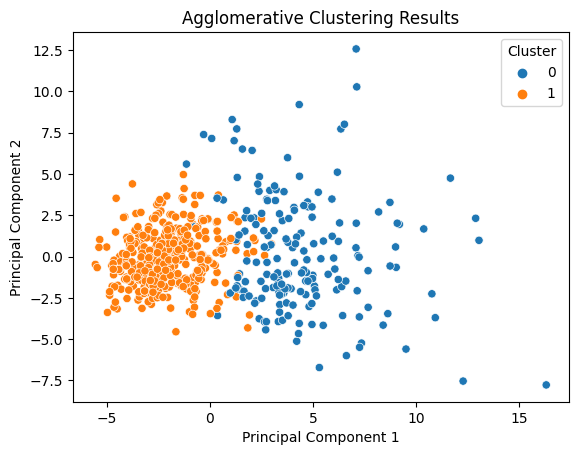

In [10]:
import seaborn as sns

# Create a DataFrame with the PCA coordinates and cluster assignments
df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df['Cluster'] = agg_clustering.labels_

# Plot the clusters using seaborn
sns.scatterplot(data=df, x='PC1', y='PC2', hue='Cluster')
plt.title("Agglomerative Clustering Results")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()